## __1. Sklearn의 digits 데이터셋을 활용하여 0~9까지 각각의__  
## __이미지 데이터와 내적 값이 가장 큰 이미지 데이터 출력__

__import packages__  

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

__Get data__

In [2]:
digits = load_digits()

__Calculate,store__

In [3]:
Index = []
Values=[]
for i in range(10):
    dot_val=-10**6
    dot_idx=-1
    x=digits.data[i]
    for j in range(11,len(digits.data)):
        y=digits.data[j]
        cur_val= (x.T@y)
        if cur_val > dot_val:
            dot_idx=j
            dot_val=cur_val
    Index.append(dot_idx)
    Values.append(dot_val)

__Plot__

Dot product result with data[0] : 3780.0
Dot product result with data[1] : 4540.0
Dot product result with data[2] : 4496.0
Dot product result with data[3] : 3546.0
Dot product result with data[4] : 3491.0
Dot product result with data[5] : 4302.0
Dot product result with data[6] : 4357.0
Dot product result with data[7] : 3688.0
Dot product result with data[8] : 4470.0
Dot product result with data[9] : 4092.0


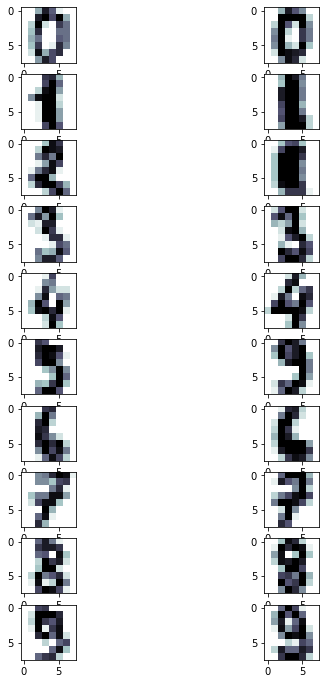

In [4]:
plt.figure(figsize=(8,12))

for i,idx in enumerate(Index):
    plt.subplot(10,2,i*2+1)
    plt.imshow(digits.images[i],cmap=plt.cm.bone_r)
    plt.subplot(10,2,i*2+2)
    plt.imshow(digits.images[idx],cmap=plt.cm.bone_r)

for i in range(10):
    print(f'Dot product result with data[{i}] : {Values[i]}')
    print('='*50)

## __2. Sklearn의 olivetti_faces 데이터셋을 활용하여 100번째__  
## __이미지 데이터와 내적 결과가 가장 큰 이미지 데이터 Plot__

__import packages__

In [5]:
from sklearn.datasets import fetch_olivetti_faces as fof
import matplotlib.pyplot as plt

__Get data__

In [6]:
face_data = fof()

__Set pivot__

In [7]:
piv_idx = 100
piv_data = face_data.data[piv_idx]

__Calcuate,store__

In [8]:
Index=-1
Value=-10**6

for i in range(len(face_data.data)):
    if i!=piv_idx:
        cart = face_data.data[i]
        cur_val=piv_data.T@cart
        if cur_val>Value:
            Value=cur_val
            Index=i

__Plot__

Dot product result with data[100] : 1774.1728515625


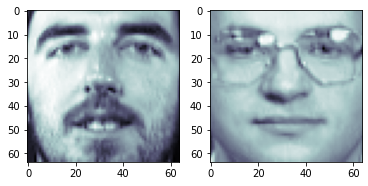

In [9]:
plt.subplot(1,2,1)
plt.imshow(face_data.images[piv_idx],cmap=plt.cm.bone)
plt.subplot(1,2,2)
plt.imshow(face_data.images[Index],cmap=plt.cm.bone)

print(f'Dot product result with data[{piv_idx}] : {Value}')
print('='*50)

# __※ 내 얼굴과 가장 큰 내적 값이 나오는 얼굴은 뭘까__

Dot product result with my image : 1862.774001013022


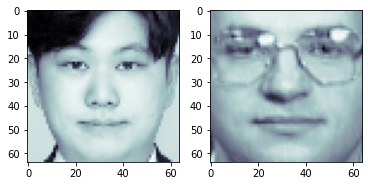

In [12]:
import os
import cv2
from sklearn.datasets import fetch_olivetti_faces as fof
import matplotlib.pyplot as plt

face_data = fof()


image_w = 64
image_h = 64
image_dir='C:/Users/i/Desktop/execute_files/'
filename='test.jpg'
img = cv2.imread(image_dir+filename)
img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
my_image = img[:,:,0]
my_image=my_image/256
my_image=my_image.flatten()

Index=-1
Value=-10**6
for i in range(len(face_data.data)):
    cart = face_data.data[i]
    cur_val=my_image.T@cart
    if cur_val>Value:
        Value=cur_val
        Index=i
            
            
plt.subplot(1,2,1)
plt.imshow(my_image.reshape(64,-1),cmap=plt.cm.bone)
plt.subplot(1,2,2)
plt.imshow(face_data.images[Index],cmap=plt.cm.bone)

print(f'Dot product result with my image : {Value}')
print('='*50)